```
Kalau kita buat listnya/summary dari perintah di module kode id :

A. Measure of Central Tendency: Mean     (P/N/S)
B. Measure of Central Tendency: Median   (P/N/S)
C. Measure of Central Tendency: Modus    (P/N/S)
D. Measure of Spread: Range              (P/N/S)
E. Measure of Spread: Variance           (P/N/S)
F. Measure of Spread: Standard Deviation (P/N/S)
G. Probability Distribution              (+C)
H. Confidence Intervals
I. Hypothesis Testing                    (+C)

*for each (A - I):
- Question/what data we want to look up
- Pre-processing as needed

===
Keterangan:
(P/N/S) : Pandas / NumPy / Scipy
(+C)    : +Conclusion (menarik informasi/kesimpulan)

===
(*)Untuk:
- contoh question,  ada di page/halamannya Assignment 2 "Examples of questions can be ..."
- more detail tentang dekripsi kolom pada dataset & special note tentang dataset, juga ada di halaman yang sama
```

In [37]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statistics
import math

In [4]:
df = pd.read_csv('dataset/nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [10]:
df.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace = True)

In [12]:
cols = ['SALE PRICE', 'GROSS SQUARE FEET', 'LAND SQUARE FEET']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [13]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [15]:
df.dropna(inplace=True)
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [17]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,48244.000000,48244.000000,4.824400e+04
mean,3.251741,4984.532191,234.324662,10939.681328,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1827.765173,1.475769,1.153281e+06
std,0.903136,3427.418090,496.361521,1072.752086,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,464.361153,0.833589,1.340131e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,3.000000,2206.750000,21.000000,10469.000000,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,1920.000000,1.000000,8.042000e+04
50%,3.000000,4660.500000,45.000000,11217.000000,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,1931.000000,1.000000,4.800000e+05
75%,4.000000,6996.000000,94.000000,11237.000000,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,1961.000000,2.000000,8.300000e+05
max,5.000000,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


---
# A. Measure of Central Tendency : Mean

**Question**

Berapa harga jual rata-rata properti di New York berdasarkan neighborhood?

**Pre-processing if needed**

In [19]:
df_use = df[df['SALE PRICE'] > 0]
df_use

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


**Implement statistical method**

In [24]:
mean_df = df_use.groupby(['NEIGHBORHOOD'])['SALE PRICE'].mean().reset_index()
mean_df

,NEIGHBORHOOD,SALE PRICE
0,AIRPORT LA GUARDIA,6.875020e+05
1,ALPHABET CITY,7.200101e+06
2,ANNADALE,6.141680e+05
3,ARDEN HEIGHTS,3.974149e+05
4,ARROCHAR,5.675062e+05
...,...,...
246,WOODHAVEN,5.923966e+05
247,WOODLAWN,6.495611e+05
248,WOODROW,6.673779e+05
249,WOODSIDE,1.566901e+06


---
# B. Measure of Central Tendency : Median

**Question**

Berapa nilai tengah harga jual properti di New York berdasarkan neighborhood?

In [26]:
df_use2 = df_use.copy()

In [27]:
median_df = df_use2.groupby(['NEIGHBORHOOD'])['SALE PRICE'].median().reset_index()
median_df

,NEIGHBORHOOD,SALE PRICE
0,AIRPORT LA GUARDIA,792000.0
1,ALPHABET CITY,6625000.0
2,ANNADALE,584500.0
3,ARDEN HEIGHTS,380000.0
4,ARROCHAR,512250.0
...,...,...
246,WOODHAVEN,559000.0
247,WOODLAWN,430000.0
248,WOODROW,549000.0
249,WOODSIDE,950000.0


---
# C. Measure of Central Tendency : Modus

**Question**

Berapa modus harga jual properti di New York berdasarkan neighborhood?

In [28]:
df_use3 = df_use.copy()

In [43]:
modus_df = df_use3.pivot_table(index = 'NEIGHBORHOOD', values = 'SALE PRICE', aggfunc = statistics.mode)
modus_df

,SALE PRICE
NEIGHBORHOOD,
AIRPORT LA GUARDIA,792000.0
ALPHABET CITY,6625000.0
ANNADALE,10.0
ARDEN HEIGHTS,380000.0
ARROCHAR,370500.0
...,...
WOODHAVEN,650000.0
WOODLAWN,525000.0
WOODROW,470000.0


---
# D. Measure of Spread: Range

**Question**

Berapa range harga jual tertinggi dengan terendah properti di New York berdasarkan neighborhood?

In [45]:
df_use4 = df_use.copy()

In [46]:
range_df = df_use4.pivot_table(index = 'NEIGHBORHOOD', values = 'SALE PRICE', aggfunc = np.ptp)
range_df

,SALE PRICE
NEIGHBORHOOD,
AIRPORT LA GUARDIA,1399990.0
ALPHABET CITY,13039160.0
ANNADALE,1289990.0
ARDEN HEIGHTS,851900.0
ARROCHAR,1600000.0
...,...
WOODHAVEN,5199990.0
WOODLAWN,14499990.0
WOODROW,11693327.0


---
# E. Measure of Spread: Variance

**Question**

Berapa variance harga jual tertinggi dengan terendah properti di New York berdasarkan neighborhood?

In [47]:
df_use5 = df_use.copy()

In [48]:
var_df = df_use5.groupby(['NEIGHBORHOOD'])['SALE PRICE'].var().reset_index()
var_df

,NEIGHBORHOOD,SALE PRICE
0,AIRPORT LA GUARDIA,3.101923e+11
1,ALPHABET CITY,1.747321e+13
2,ANNADALE,7.012766e+10
3,ARDEN HEIGHTS,1.464635e+10
4,ARROCHAR,8.959645e+10
...,...,...
246,WOODHAVEN,1.199117e+11
247,WOODLAWN,3.340218e+12
248,WOODROW,1.362830e+12
249,WOODSIDE,7.039130e+12


---
# F. Measure of Spread: Standard Deviation

**Question**

Berapa standar deviasi harga jual tertinggi dengan terendah properti di New York berdasarkan neighborhood?

In [49]:
df_use6 = df_use.copy()

In [50]:
std_df = df_use6.groupby(['NEIGHBORHOOD'])['SALE PRICE'].std().reset_index()
std_df

,NEIGHBORHOOD,SALE PRICE
0,AIRPORT LA GUARDIA,5.569491e+05
1,ALPHABET CITY,4.180097e+06
2,ANNADALE,2.648163e+05
3,ARDEN HEIGHTS,1.210221e+05
4,ARROCHAR,2.993267e+05
...,...,...
246,WOODHAVEN,3.462827e+05
247,WOODLAWN,1.827626e+06
248,WOODROW,1.167403e+06
249,WOODSIDE,2.653136e+06


---
# G. Probability Distribution

**Question**

Bagaimana distribusi probabilitas dari harga jual properti di Arden Heights?

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df_use7 = df_use[df_use['NEIGHBORHOOD'] == 'ARDEN HEIGHTS']

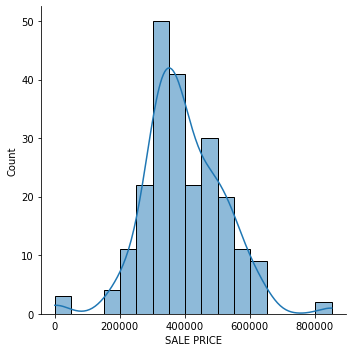

In [67]:
sns.displot(data = df_use7,
            x = 'SALE PRICE',
            kde=True)

**Kesimpulan**

Berdasarkan grafik yang telah dibuat dapat dilihat bahwa grafik garisnya nyaris normal namun jika dilihat dari barplotnya terlihat bahwa distribusinya lebih condong ke Gamma karena memiliki sedikit condong atau skew ke arah kiri sehingga dapat disimpulkan bahwa harga properti di Arden Height memiliki persebaran cukup merata untuk jumlah properti harga tinggi, rendah, dan menengah

---
# H. Confidence Intervals

**Question**

Berapa true mean dari harga jual properti di Arden Heights?

In [81]:
df_use8 = df_use7.groupby('NEIGHBORHOOD').agg({'SALE PRICE' : [np.mean, np.std, np.size]})
df_use8

SALE PRICE                   
                        mean           std size
NEIGHBORHOOD                                   
ARDEN HEIGHTS  397414.915556  121022.09153  225

In [82]:
mean_8 = 397414.915556
std_8 = 121022.09153
n = 225
z = 1.9

In [83]:
se = std_8 / np.sqrt(n)
se

8068.1394353333335

In [84]:
lcb = mean_8 - z * se
ucb = mean_8 + z * se
lcb,ucb

(382085.4506288667, 412744.38048313337)

**Kesimpulan**

Berdasarkan perhitungan confidence interval, true mean dari harga properti di Arden Heights adalah antara 382085.4506288667 dan 412744.38048313337

---
# I. Hypothesis Testing

<AxesSubplot:xlabel='NEIGHBORHOOD', ylabel='count'>

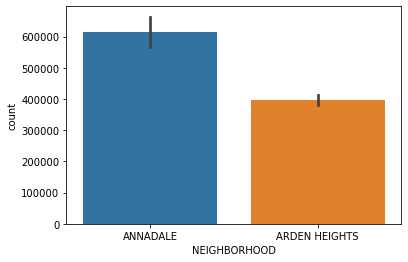

In [91]:
# Bivariate analysis
df_use_9 = df_use[(df_use['NEIGHBORHOOD'] == 'ARDEN HEIGHTS') | (df_use['NEIGHBORHOOD'] == 'ANNADALE')]
sns.barplot(x='NEIGHBORHOOD',y='SALE PRICE',data=df_use_9)


<AxesSubplot:xlabel='NEIGHBORHOOD', ylabel='count'>

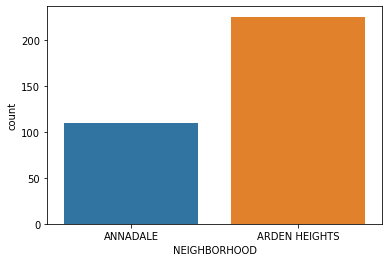

In [92]:
sns.countplot(x='NEIGHBORHOOD',data=df_use_9)

**Null Hypothesis        : μ1 = μ2**

**Alternative Hypothesis : μ1 != μ2**

Berdasarkan grafik muncul hipotesis bahwa harga properti di Annadale lebih tinggi signifikan dari harga properti di Arden Heights, melihat jumlah data annadale lebih sedikit tpi harga total lebih besar dari Arden Heights

In [93]:
ard = df_use[df_use['NEIGHBORHOOD'] == 'ARDEN HEIGHTS']
ann = df_use[df_use['NEIGHBORHOOD'] == 'ANNADALE']

In [94]:
n1 = len(ard)
mean1 = ard['SALE PRICE'].mean()
std1 = ard['SALE PRICE'].std()

n1, mean1, std1

(225, 397414.91555555555, 121022.09153039023)

In [95]:
n2 = len(ann)
mean2 = ann['SALE PRICE'].mean()
std2 = ann['SALE PRICE'].std()

n2, mean2, std2

(110, 614168.0454545454, 264816.2828920446)

In [98]:
import statsmodels.api as sm
sm.stats.ztest(ard['SALE PRICE'], ann['SALE PRICE'], alternative = 'two-sided')

(-10.286034868876607, 8.146221233248191e-25)

**Kesimpulan**

Pada analisis ini saya meggunakan alternative = 'two-sided' karena null hypothesis yang diperiksa adalah ketidaksamaan dari harga properti. Karena p-value (8.14e-25) sangat kecil, maka kita dapat **reject the null hypothesis** bahwa harga properti di Annadale lebih tinggi signifikan daripada harga properti di Arden Heights. 

---
# Overall Analysis

Berdasarkan analisis yang telah dilakukan dapat disimpulkan sebagai berikut.

1. Rata - rata harga properti di Arden Heights adalah 397414.915
2. Nilai tengah harga properti di Arden Heights adalah 380000
3. Modus dari harga properti di Arden Heights adalah 380000
4. Range dari harga properti di Arden Heights adalah 380000
5. Varians dari harga properti di Arden Heights adalah 1.464635e+10
6. Standar Deviasi dari harga properti di Arden Heights adalah 121022
7. Berdasarkan grafik yang telah dibuat dapat dilihat bahwa grafik garisnya nyaris normal namun jika dilihat dari barplotnya terlihat bahwa distribusinya lebih condong ke Gamma karena memiliki sedikit condong atau skew ke arah kiri sehingga dapat disimpulkan bahwa harga properti di Arden Height memiliki persebaran cukup merata untuk jumlah properti harga tinggi, rendah, dan menengah
8. Berdasarkan perhitungan confidence interval, true mean dari harga properti di Arden Heights adalah antara 382085.4506288667 dan 412744.38048313337
9. Pada analisis ini saya meggunakan alternative = 'two-sided' karena null hypothesis yang diperiksa adalah ketidaksamaan dari harga properti. Karena p-value (8.14e-25) sangat kecil, maka kita dapat reject the null hypothesis bahwa harga properti di Annadale lebih tinggi signifikan daripada harga properti di Arden Heights.